<img src = "https://drive.google.com/uc?export=view&id=/1902ZTXJsPQkW0hmPpFwRk1VpgRz-OGxl/" alt = "Encabezado MLDS" width = "100%">  </img>

# **Proyecto Aplicado MLDS-2: Reconocimiento de Imagenes con Redes Neuronales Artificiales y Tensorflow**
---
Presentado por:
- Juan Diego Ocampo M. (Grupo 6)

### **Tabla de Contenidos**
---
1. Metodología CRISP-MD (Parte 1): Entendimiento del Negocio <br>
2. Metodología CRISP-MD (Parte 2): Entendimiento de los Datos <br>
3. Metodología CRISP-MD (Parte 3): Preparación de los Datos <br>
    3.1. Descargar e Importar Librerías <br>
    3.2. Inicializar Constantes <br>
    3.3. Importar Dataset <br>
    3.4. Exploración de los Datos <br>
    3.5. Pre-Procesamiento de Datos <br>
        - 3.5.1. Inspección del Espacio de Color <br>
        - 3.5.2. Crear Dataset de Validación <br>
4. Metodología CRISP-MD (Parte 4): Modelado <br>
    4.1. Definición del Modelo <br>
    4.2. Compilación del Modelo <br>
    4.3. Entrenamiento del Modelo <br>
5. Metodología CRISP-MD (Parte 5): Evaluación <br>
6. Metodología CRISP-MD (Parte 6): Despliegue <br>
7. Conclusiones <br>
8. Vídeo de Presentación <br>

## 1. **Metodología CRISP-MD (Parte 1): Entendimiento del Negocio**
---
El reconocimiento de imágenes (visto desde la óptica de visión de máquinas) hace referencia al conjunto de algoritmos y técnicas para etiquetar y clasificar los elementos dentro de una imagen. Estos algoritmos se centran principalmente en el contenido que tiene la imagen, razón por la cual los modelos en la mayoría de los casos están entrenados para tomar una imagen de entrada y generar etiquetas previamente clasificadas que definen dicha imagen. 


Esta tecnología surge como una "imitación" de las técnicas que tienen los seres vivos para detectar y clasificar los objetos que se encuentran en su entorno. Sin embargo, mientras que esta tarea se realiza con facilidad internamente en los cerebros de las personas y animales, a los computadores se les dificulta bastante debido a su naturaleza intensiva en computación. Estos modelos a menudo se entrenan en millones de imágenes preetiquetadas utilizando técnicas de aprendizaje supervisado.

Hoy en día, existen múltiples aplicaciones para las técnicas de reconocimiento de imágenes, tales como la detección de semáforos, vehículos, señales de transito u otros objetos para la implementación de coches autónomos en la industria automotriz, la detección y clasificación de tumores en el área de la salud, el marketing o la seguridad industrial solo por mencionar algunos ejemplos.

El objetivo de este trabajo es llevar a cabo un primer acercamiento (y evaluar el desempeño resultante) con las técnicas de aprendizaje de máquina para el reconocimiento de imágenes más utilizadas en la industria utilizando las herramientas dispuestas por uno de los actores principales del mercado como lo es Google: Tensorflow.

## 2. **Metodología CRISP-MD (Parte 2): Entendimiento de los Datos**
---

Para el desarrollo de este proyecto utilizaremos el dataset **CIFAR10**, el cual contiene 60.000 imágenes en color de 32x32 pixeles, las cuales distribuye en 10 etiquetas diferentes: **'Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship' y 'Truck'**. Este conjunto de datos se puede descargar desde este [enlace](https://www.cs.toronto.edu/~kriz/cifar.html).

El conjunto de datos se encuentra ya separado en dos subconjuntos: entrenamiento y prueba. Estos subconjuntos están conformados a su vez por 50.000 y 10.000 imágenes respectivamente. De lo anterior sabemos que, el conjunto de entrenamiento cuenta con 5.000 imágenes para cada clase (etiqueta) mientras que el de prueba tiene unas 1.000.  

Internamente, este dataset se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10.000 imágenes. El lote de prueba contiene exactamente 1.000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio. Cabe mencionar que algunos lotes de formación pueden contener más imágenes de una clase que de otra.


## 3. **Metodología CRISP-MD (Parte 3): Preparación de los Datos**
---

### 3.1. **Descargar e Importar Librerías**

A continuación se descargan las librerías necesarias para la ejecución de este Notebook

In [1]:
# Descargar Librerías 
try:
    !pip install -r requirements.txt
    print('Librerías instaladas con éxito!') 
except Exception() as error:
    print(f"Error: {error}")

Librerías instaladas con éxito!


In [2]:
# Importar Librerías
try:
    import os as os, numpy as np, tensorflow as tf, matplotlib.pyplot as plt, itertools
    from IPython.display import display
    from time import strftime
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input, Dense, Activation, Dropout
    from tensorflow.keras.callbacks import TensorBoard
    from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
    from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
    from sklearn.neural_network import MLPClassifier
    from IPython.lib.display import YouTubeVideo
    import coremltools
    import warnings
    warnings.simplefilter(action='ignore')
    # Configurar Semilla
    np.random.seed(42)
    tf.random.set_seed(42)
    # Configurar Nivel de Precisión
    np.set_printoptions(precision = 3)
    %matplotlib inline
    print('Librerías cargadas con éxito!') 
except Exception() as error:
    print(f"Error: {error}")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


Librerías cargadas con éxito!


### 3.2. **Inicializar Constantes**

A continuación se inicializan algunas constantes que son de utilidad para ejecutar el código de este Notebook, tales como los nombres de las etiquetas del dataset *CIFAR10*, las dimensiones de las imágenes, las rutas de los archivos o el tamaño de los subconjuntos de validación.

In [3]:
# Etiquetas de cada clase del dataset CIFAR100
'''
CLASS_NAMES = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle',
                'chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','computer_keyboard',
                'lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree',
                'plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider',
                'squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']
LABEL_NAMES = [item.capitalize() for item in CLASS_NAMES]
'''
# Etiquetas de cada clase del dataset CIFAR10
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
NR_CLASSES = len(LABEL_NAMES)
# Dimensiones de cada Imagen
IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS = 32, 32, 3
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
# Tamaño del Dataset de Validación
VALIDATION_SIZE = 0.2
# Ruta de los Archivos de Evaluación en TensorBoard
LOG_DIR = 'tensorboard_cifar_logs/'

### 3.3. **Importar Dataset**

El dataset *CIFAR10* cuenta con una versión específica para utilizar en Python, la cual se puede descargar [aquí](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). Como se menciona anteriormente, el conjunto de datos está compuesto por cinco lotes de 10.000 imágenes que a su vez componen el subconjunto de entrenamiento y un sexto lote con otras 10.000 imágenes que conforman el subconjunto de prueba.

Por lo tanto, es posible importar el conjunto de imágenes vectorizadas y separarlas en conjuntos de entrenamiento y prueba utilizando la función **`load_data`** del módulo *datasets* de *Keras* y *Tensorflow*.



In [4]:
# Descargar Dataset CIFAR 100 en formato NumPy Array
# (x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
# Descargar Dataset CIFAR 10 en formato NumPy Array
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

### 3.4. **Exploración de los Datos**

Las siguientes tres celdas contienen una breve exploración de los datos, con la cual se puede apreciar un poco mejor los datos que se utilizarán para entrenar el modelo. 

En la primera de ellas se visualiza una imagen al azar del conjunto de pruebas *x_train_all*, en la segunda se visualizan las primeras 10 imágenes del dataset de entrenamiento y en la tercera se inspeccionan las dimensiones del dataset (cantidad, ancho, alto y canales de color).

Etiqueta del elemento 861 de x_train_all: Ship


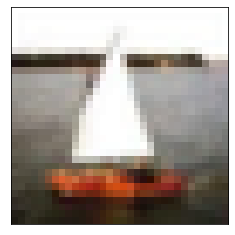

In [6]:
# Visualizar una Imagen al azar del conjunto de prueba
randon_index = np.random.randint(0, len(x_train_all)-1)
random_item_label = y_train_all[randon_index][0]
plt.imshow(tf.keras.preprocessing.image.array_to_img(x_train_all[randon_index]))
plt.yticks([]), plt.xticks([])
print(f'Etiqueta del elemento {randon_index + 1} de x_train_all: {LABEL_NAMES[random_item_label]}')

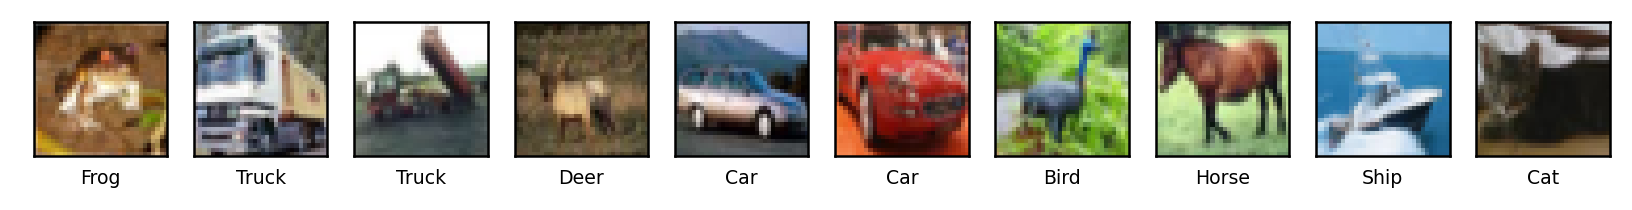

In [7]:
# Visualizar los primeros 10 items del conjunto de prueba
plt.figure(figsize = (9, 4), dpi = 226)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([]), plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 6)
    plt.imshow(x_train_all[i])

In [8]:
# Explorar dimensiones del Dataset
nr_images, x, y, c = x_train_all.shape
print(f'Número de Imágenes en x_train_all: {nr_images} \t| Ancho = {x} \t| Altura = {y} \t| Canales = {c}')
print('Shape del conjunto de pruebas x_train_all: ', x_test.shape)

Número de Imágenes en x_train_all: 50000 	| Ancho = 32 	| Altura = 32 	| Canales = 3
Shape del conjunto de pruebas x_train_all:  (10000, 32, 32, 3)


### 3.5. **Pre-Procesamiento de los Datos**

En las siguientes celdas se lleva a cabo la preparación de los datos, de modo que estos puedan ser utilizados para entrenar un modelo y posteriormente hacer predicciones.

#### 3.5.1. **Inspección del Espacio de Color**

Debido a que el dataset *CIFAR10* contiene las imágenes ya en formato vectorizado (NumPy Array) no es mucho el trabajo de pre-procesamiento que se debe hacer. A continuazión se realizará una inspección para ver el tipo de dato que contiene cada canal de cada pixel. A continuación, se hará un escalado de los datos para que cada uno se ubique en un rango entre $0$ y $1$.

In [9]:
# Verificar tipo de dato del conjunto de prueba
print(f'Tipo de dato de x_train_all: {type(x_train_all[0][0][0][0])}')
# Normalización de los vectores RGB
x_train_all, x_test = x_train_all/255.0, x_test/255.0
# Visualización de los valores RGB del primer pixel del elemento aleaorio de la sección 
print(f'Valores RGB (normalizados) del primer pixel del elemento {randon_index + 1} de x_train_all: {x_train_all[0][0][0]}')

Tipo de dato de x_train_all: <class 'numpy.uint8'>
Valores RGB (normalizados) del primer pixel del elemento 861 de x_train_all: [0.231 0.243 0.247]


Posteriormente, se realiza una reducción de la dimensionalidad del problema con el fin de reducir la capacidad de cómputo requerida para entrenar el modelo. Originalmente, se tiene que *x_train_all* tiene un shape de $(50.000, 32, 32, 3)$, lo cual corresponde a los 3 canales de color (RGB) de cada una de las 50.000 imágenes de 32x32 pixeles. Sin embargo, es posible convertir el shape de *x_train_all* a $(50.000, 3072)$ en donde las columnas contienen todos los datos cada una de las 50.000.

Esto es posible utilizando el método **`reshape`** de *NumPy*. Cabe mencionar que este proceso se realiza también con el subconjunto de pruebas *x_test*.

In [10]:
# Reducir la Dimensionalidad del Problema
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
print(f'Shape de x_train_all después de la reducción de dimensionalidad:  {x_train_all.shape}')
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape de x_test después de la reducción de dimensionalidad: {x_test.shape}')

Shape de x_train_all después de la reducción de dimensionalidad:  (50000, 3072)
Shape de x_test después de la reducción de dimensionalidad: (10000, 3072)


#### 3.5.2. **Crear Dataset de Validación**

Finalmente, se procede a crear el subconjunto de validación, el cual corresponde en este caso al $20\%$ de los datos del conjunto de entrenamiento inicial. Este subconjunto creado será utilizado para evaluar el modelo durante la fase de entrenamiento con el fin de ir ajustando los hiperparámetros del mismo para obtener el mejor resultado posible.

In [11]:
# Dividir conjuntos de prueba iniciales en subconjuntos prueba y validación
TRAINING_SET_SPLITTER = int(x_train_all.shape[0] * VALIDATION_SIZE)
x_train, y_train = x_train_all[TRAINING_SET_SPLITTER:], y_train_all[TRAINING_SET_SPLITTER:]
x_val, y_val = x_train_all[:TRAINING_SET_SPLITTER], y_train_all[:TRAINING_SET_SPLITTER]
print(f'Shape de x_train: {x_train.shape}')
print(f'Shape de y_train: {y_train.shape}')
print(f'Shape de x_val: {x_val.shape}')
print(f'Shape de y_val: {y_val.shape}')

Shape de x_train: (40000, 3072)
Shape de y_train: (40000, 1)
Shape de x_val: (10000, 3072)
Shape de y_val: (10000, 1)


## 4. **Metodología CRISP-MD (Parte 4): Modelado**
---

En esta etapa se procede a elegir las técnicas de modelado apropiadas para el problema para desarrollar el modelo de Machine Learning con base en estas.

### 4.1. **Definición del Modelo: Perceptrón Multicapa**

Un perceptrón multicapa (MLP por sus siglas en inglés) es una clase de red neuronal artificial de retroalimentación (ANN) que se caracteriza por emplear la activación de umbral como herramienta para desarrollar predicciones. Los MLP solían ser un modelo de Machine Learning muy popular en la década de los 80's en aplicaciones como  el reconocimiento de voz, de imágenes y el software de traducción automática. 

Sin embargo, su utilización se vio truncada debido a la aparición de las máquinas de soporte vectorial, que no solo eran más eficientes sino muchísimo más simples. No ha sido sino hasta el surgimiento del *deep learning* alrededor de la última década que ha regresado el interés por esta clase de modelos. 

Estos modelos usualmente están conformados por no menos de tres capas de nodos, una capa de entrada, una capa de salida y una capa oculta. Adicionalmente, utilizan una técnica de aprendizaje supervisado llamada retropropagación para la fase de entrenamiento. Aquí, cada nodo es una neurona que utiliza una función de activación no lineal (aexcepción de los nodos de entrada), lo cual hace que sea capaz de distinguir datos que no se pueden separar linealmente.

In [12]:
# Funciones de Activación 
ACTIVATION_FUNC_1, ACTIVATION_FUNC_2, ACTIVATION_FUNC_OUT = 'relu', 'sigmoid', 'softmax'

Como se menciona anteriormente, la principal característica de estos modelos es que utilizan la función de activación como una herramienta para desarrollar predicciones. En este caso, se utiliza la función *"rectified linear unit (relu)"* como función de activación para todas las capas con excepción de la capa de salida, que emplea la función de activación **softmax** con el fin de  normalizar la salida de una la red a una distribución de probabilidad sobre las clases de salida predichas.

In [19]:
# Modelo Nº 1
model_1 = Sequential()
model_1.add(Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1'))
model_1.add(Dense(units = 64, activation = 'relu', name = 'm1_hidden2'))
model_1.add(Dense(units = 16, activation = 'relu', name = 'm1_hidden3'))
model_1.add(Dense(units = 10, activation = 'softmax', name = 'm1_output'))

In [25]:
# Modelo Nº 2
model_2 = Sequential()
model_2.add(Dropout(rate = 0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense(units = 128, activation = 'relu', name = 'm2_hidden1'))
model_2.add(Dense(units = 64, activation = 'relu', name = 'm2_hidden2'))
model_2.add(Dense(units = 16, activation = 'relu', name = 'm2_hidden3'))
model_2.add(Dense(units = 10, activation = 'softmax', name = 'm2_output'))

In [30]:
# Modelo Nº 3
model_3 = Sequential()
model_3.add(Dropout(rate = 0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense(units = 128, activation = 'relu', name = 'm3_hidden1'))
model_3.add(Dropout(rate = 0.25, seed = 42))
model_3.add(Dense(units = 64, activation = 'relu', name = 'm3_hidden2'))
model_3.add(Dense(units = 15, activation = 'relu', name = 'm3_hidden3'))
model_3.add(Dense(units = 10, activation = 'softmax', name = 'm3_output'))

In [35]:
# Modelo Nº 4
model_4 = Sequential()
model_4.add(Dropout(rate = 0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_4.add(Dense(units = 128, activation = 'relu', name = 'm4_hidden1'))
model_4.add(Dropout(rate = 0.25, seed = 42))
model_4.add(Dense(units = 64, activation = 'relu', name = 'm4_hidden2'))
model_4.add(Dropout(rate = 0.2, seed = 42))
model_4.add(Dense(units = 15, activation = 'relu', name = 'm4_hidden3'))
model_4.add(Dense(units = 10, activation = 'softmax', name = 'm4_output'))

In [41]:
# Modelo Nº 5
model_5 = MLPClassifier(hidden_layer_sizes = (TOTAL_INPUTS,),
                        activation = 'relu', 
                        solver = 'adam', 
                        batch_size = 1000, 
                        verbose = True, 
                        early_stopping = True, 
                        n_iter_no_change = 5,
                        max_iter = 100,
                        validation_fraction = 0.2)

### 4.2. **Compilación del Modelo**

Para compilar cada uno de los modelos se utiliza la función **`compile`** de Keras, la cual toma como parámetros de entrada una función de pérdidas que es la que se tratará de optimizar, un optimizador determinado y una serie de métricas para la evaluación. La documentación completa para está función se puede ver haciendo clic [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

La función de pérdidas que se utilizará en este caso es la entropía cruzada categórica (Categorical Cross-Entropy), la cual está diseñada particularmente para cuantificar la diferencia entre dos distribuciones de probabilidad, razón por la cual utilizada en tareas de clasificación multi-clase, en las cuales la predicción solo puede pertenecer a una de muchas categorías posibles, y el modelo debe ser capaz de decidir a cuál clase pertenece. **Tensorflow** y **Keras** implementan una versión más eficiente en términos computacionales de esta función llamada **`reshsparse_categorical_crossentropyape`**, la cual será utilizada en este ejercicio.

En cuanto al optimizador, se utiliza el algoritmo de optimización de Adam (**`adam`**) debido a que es un algoritmo reciente diseñado para ser eficiente en términos computacionales nuevamente. Este algoritmo es esencialmente una extensión del algoritmo estocástico **gradient descend**, que se utiliza ampliamente en  aplicaciones de deep learninr, visión de máquina y procesamiento de lenguaje natural.

In [20]:
# Configurar Parámetros
OPTIMISER, LOSS_FUNCTION, METRICS = 'adam', 'sparse_categorical_crossentropy', ['accuracy', 'precision', 'recall']
# Función para Compilar Modelos
def compile_model(model, optimiser, loss_func, metrics):
    model.compile(optimizer = optimiser, loss = loss_func, metrics = metrics)
    print(f'Tipo de dato de {model}: {type(model_1)}')
    print(f'Resumen de {model}: \n {model_1.summary()}')    

In [21]:
# Compilar Modelo 1
compile_model(model = model_1, optimiser = OPTIMISER, loss_func = LOSS_FUNCTION, metrics = 'accuracy')

Tipo de dato de <tensorflow.python.keras.engine.sequential.Sequential object at 0x1849672b0>: <class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________
Resumen de <tensorflow.python.keras.engine.sequential.Sequential object at 0x1849672b0>: 

In [26]:
# Compilar Modelo 2
compile_model(model = model_2, optimiser = OPTIMISER, loss_func = LOSS_FUNCTION, metrics = 'accuracy')

Tipo de dato de <tensorflow.python.keras.engine.sequential.Sequential object at 0x1846f2eb0>: <class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________
Resumen de <tensorflow.python.keras.engine.sequential.Sequential object at 0x1846f2eb0>: 

In [31]:
# Compilar Modelo 3
compile_model(model = model_3, optimiser = OPTIMISER, loss_func = LOSS_FUNCTION, metrics = 'accuracy')

Tipo de dato de <tensorflow.python.keras.engine.sequential.Sequential object at 0x186f9ee80>: <class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________
Resumen de <tensorflow.python.keras.engine.sequential.Sequential object at 0x186f9ee80>: 

In [36]:
# Compilar Modelo 4
compile_model(model = model_4, optimiser = OPTIMISER, loss_func = LOSS_FUNCTION, metrics = 'accuracy')

Tipo de dato de <tensorflow.python.keras.engine.sequential.Sequential object at 0x186f9ea00>: <class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________
Resumen de <tensorflow.python.keras.engine.sequential.Sequential object at 0x186f9ea00>: 

In [24]:
# Compilar Modelo 5
# El modelo 5, al estar diseñado con la clase MLPC de sklearn no requiere utilizar la función compile_model().

### 4.3. **Entrenamiento del Modelo**

Para entrenar cada uno de los modelos se utiliza la función **`fit`** de Keras. Con el fin de disminuir la cantidad de código se crea la función **`train_model`**, la cual se ejecutará una vez por cada modelo creado y compilado.

Cabe mencionar que los modelos de Machile Learning creados mediante redes neuronales artificiales son bastante susceptibles al sobreajuste (overfitting) debido a la gran cantidad de parámetros que manejan. Por ello, se hace uso de dos técnicas para prevenir este efecto:

- **Early Stopping**:  se utiliza la función **`EarlyStopping`** de **Keras.callbacks**, la cual automáticamente detiene el proceso de aprendizaje cuando se detecte que tras un número dado de iteraciones, el modelo no mejora su desempeño.
- **Dropout**: es una técnica de regularización para redes neuronales que sugiere que al ignorar algunas de las neuronas de cada capa de forma aleatoriam durante el entrenamiento se logra reducir el sobreajuste.

In [15]:
# Función para crear los registros de Tensorboard (Visualizar Aprendizaje)
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print(f'Directorio para {model_name} creado con éxito!')
    return TensorBoard(log_dir = dir_paths)

In [16]:
# Parámetros para el Entrenamiento de los Modelos
SAMPLES_PER_BATCH, EPOCH_NUMBER = 1000, 100
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights = True)

# Función para Entrenar un Modelo de Keras
def train_model(model, x_train, y_train, batch_size, epochs, callbacks, validation_data):
    try:
        trained_model = model_1.fit(x_train, 
                                    y_train, 
                                    batch_size = batch_size, 
                                    epochs = epochs, 
                                    callbacks = callbacks, 
                                    verbose = 1, 
                                    validation_data = validation_data)
        print('Modelo entrenado exitosamente!')
        return trained_model
    except Exception() as error:
        print(f'Error entrenado el modelo: {error}')

In [37]:
# Exportar Modelos
model_1.save(os.getcwd() + '/model1')
model_2.save(os.getcwd() + '/model2')
model_3.save(os.getcwd() + '/model3')
model_4.save(os.getcwd() + '/model4')

In [24]:
# Entrenar Modelo 1
model_1_training = train_model(model = model_1, 
                            x_train = x_train, 
                            y_train = y_train, 
                            batch_size = SAMPLES_PER_BATCH, 
                            epochs = EPOCH_NUMBER,
                            callbacks = [get_tensorboard('Modelo 1'), early_stopping_callback],
                            validation_data = (x_val, y_val))

File exists
Epoch 1/100
40/40 [==============================] - 1s 22ms/step - loss: 1.1623 - accuracy: 0.5862 - val_loss: 1.4763 - val_accuracy: 0.4898
Epoch 2/100
40/40 [==============================] - 1s 19ms/step - loss: 1.1730 - accuracy: 0.5824 - val_loss: 1.4609 - val_accuracy: 0.4955
Epoch 3/100
40/40 [==============================] - 1s 19ms/step - loss: 1.1619 - accuracy: 0.5889 - val_loss: 1.4486 - val_accuracy: 0.5015
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 1.1556 - accuracy: 0.5909 - val_loss: 1.4458 - val_accuracy: 0.5046
Epoch 5/100
40/40 [==============================] - 1s 19ms/step - loss: 1.1594 - accuracy: 0.5860 - val_loss: 1.4649 - val_accuracy: 0.4918
Epoch 6/100
40/40 [==============================] - 1s 22ms/step - loss: 1.1592 - accuracy: 0.5892 - val_loss: 1.4691 - val_accuracy: 0.4952
Epoch 7/100
40/40 [==============================] - 1s 20ms/step - loss: 1.1463 - accuracy: 0.5935 - val_loss: 1.4548 - val_accuracy: 0

In [29]:
# Entrenar Modelo 2
model_2_training = train_model(model = model_2, 
                            x_train = x_train, 
                            y_train = y_train, 
                            batch_size = SAMPLES_PER_BATCH, 
                            epochs = EPOCH_NUMBER,
                            callbacks = [get_tensorboard('Modelo 2'), early_stopping_callback],
                            validation_data = (x_val, y_val))

Directorio para Modelo 2 creado con éxito!
Epoch 1/100
40/40 [==============================] - 1s 27ms/step - loss: 1.0517 - accuracy: 0.6248 - val_loss: 1.5449 - val_accuracy: 0.4895
Epoch 2/100
40/40 [==============================] - 1s 19ms/step - loss: 1.0613 - accuracy: 0.6218 - val_loss: 1.5163 - val_accuracy: 0.5001
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0645 - accuracy: 0.6207 - val_loss: 1.5223 - val_accuracy: 0.4909
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 1.0489 - accuracy: 0.6281 - val_loss: 1.5415 - val_accuracy: 0.4903
Epoch 5/100
40/40 [==============================] - 1s 24ms/step - loss: 1.0568 - accuracy: 0.6222 - val_loss: 1.5512 - val_accuracy: 0.4845
Epoch 6/100
40/40 [==============================] - 1s 26ms/step - loss: 1.0502 - accuracy: 0.6256 - val_loss: 1.5314 - val_accuracy: 0.4911
Epoch 7/100
40/40 [==============================] - 1s 23ms/step - loss: 1.0423 - accuracy: 0.6281 - val

In [34]:
# Entrenar Modelo 3
model_3_training = train_model(model = model_3, 
                            x_train = x_train, 
                            y_train = y_train, 
                            batch_size = SAMPLES_PER_BATCH, 
                            epochs = EPOCH_NUMBER,
                            callbacks = [get_tensorboard('Modelo 3'), early_stopping_callback],
                            validation_data = (x_val, y_val))

Directorio para Modelo 3 creado con éxito!
Epoch 1/100
40/40 [==============================] - 1s 26ms/step - loss: 1.0249 - accuracy: 0.6345 - val_loss: 1.5749 - val_accuracy: 0.4887
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 1.0309 - accuracy: 0.6317 - val_loss: 1.5494 - val_accuracy: 0.4966
Epoch 3/100
40/40 [==============================] - 1s 21ms/step - loss: 1.0326 - accuracy: 0.6326 - val_loss: 1.5517 - val_accuracy: 0.4889
Epoch 4/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0165 - accuracy: 0.6379 - val_loss: 1.5703 - val_accuracy: 0.4916
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0204 - accuracy: 0.6371 - val_loss: 1.5831 - val_accuracy: 0.4807
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0171 - accuracy: 0.6387 - val_loss: 1.5552 - val_accuracy: 0.4893
Epoch 7/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0160 - accuracy: 0.6396 - val

In [40]:
# Entrenar Modelo 4
model_4_training = train_model(model = model_4, 
                            x_train = x_train, 
                            y_train = y_train, 
                            batch_size = SAMPLES_PER_BATCH, 
                            epochs = EPOCH_NUMBER,
                            callbacks = [get_tensorboard('Modelo 4'), early_stopping_callback],
                            validation_data = (x_val, y_val))

File exists
Epoch 1/100
40/40 [==============================] - 1s 24ms/step - loss: 0.9907 - accuracy: 0.6485 - val_loss: 1.6139 - val_accuracy: 0.4832
Epoch 2/100
40/40 [==============================] - 1s 20ms/step - loss: 1.0036 - accuracy: 0.6419 - val_loss: 1.5802 - val_accuracy: 0.4943
Epoch 3/100
40/40 [==============================] - 1s 18ms/step - loss: 1.0031 - accuracy: 0.6452 - val_loss: 1.5827 - val_accuracy: 0.4887
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 0.9884 - accuracy: 0.6495 - val_loss: 1.5969 - val_accuracy: 0.4858
Epoch 5/100
40/40 [==============================] - 1s 21ms/step - loss: 0.9897 - accuracy: 0.6501 - val_loss: 1.6128 - val_accuracy: 0.4786
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 0.9932 - accuracy: 0.6471 - val_loss: 1.5871 - val_accuracy: 0.4863
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 0.9897 - accuracy: 0.6475 - val_loss: 1.5963 - val_accuracy: 0

In [42]:
# Entrenar Modelo 5
try:
    model_5.fit(x_train, y_train.reshape((y_train.shape[0], )))
    print('Modelo entrenado exitosamente!')
except Exception() as error:
    print(f'Error entrenado el modelo: {error}')

Iteration 1, loss = 5.44216824
Validation score: 0.227000
Iteration 2, loss = 2.04780466
Validation score: 0.301250
Iteration 3, loss = 1.90857543
Validation score: 0.349750
Iteration 4, loss = 1.83257708
Validation score: 0.370000
Iteration 5, loss = 1.78176936
Validation score: 0.362750
Iteration 6, loss = 1.74190014
Validation score: 0.386000
Iteration 7, loss = 1.71410102
Validation score: 0.405375
Iteration 8, loss = 1.68711421
Validation score: 0.394125
Iteration 9, loss = 1.66344761
Validation score: 0.402375
Iteration 10, loss = 1.64794708
Validation score: 0.416250
Iteration 11, loss = 1.62181388
Validation score: 0.409500
Iteration 12, loss = 1.60923066
Validation score: 0.428125
Iteration 13, loss = 1.58982702
Validation score: 0.428875
Iteration 14, loss = 1.57916233
Validation score: 0.425000
Iteration 15, loss = 1.56685261
Validation score: 0.428000
Iteration 16, loss = 1.55168157
Validation score: 0.442250
Iteration 17, loss = 1.53825994
Validation score: 0.435250
Iterat

Es posible visualizar el proceso de aprendizaje del modelo "en vivo" utilizando la herramienta **`Tensorboard`** de **Tensorflow**. Para ello se debe escribir el siguiente comando en el **Terminal**:

<p style="background:white">
<code style="background:white;color:black"> tensorboard --logdir= PATH_TO_TENSORBOARD_LOGS
</code>
</p>

Al ejecutar este comando aparecerá lo siguiente:

<p style="background:white">
<code style="background:white;color:black"> 
    Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all <br>
    TensorBoard 2.5.0 at *http://localhost:6006/* (Press CTRL+C to quit)
</code>
</p>

La URL que se muestra en esta celda es un ejemplo únicamente. Para visualizar el aprendizaje del modelo se debe copiar y abrir dicha URL en un navegador web.


In [44]:
# Generar URL de Tensorboard para Visualizar Aprendizaje
path = os.getcwd() + '/tensorboard_cifar_logs'
!tensorboard --logdir=$path

zsh:1: no matches found: (Capstone Project)/Notebooks/tensorboard_cifar_logs


## 5. **Metodología CRISP-MD (Parte 5): Evaluación**
---

Después de realizar los procesos de feature engineering, entrenamiento e implementación de un nodelo, es importante averiguar qué tan efectivo es el modelo basado en un conjunto de métricas, las cuales se obtienen evaluando cada modelo con los conjuntos de prueba. En este caso, como el tipo de modelo que se utiliza (Multilayer Perceptron) utiliza el algoritmo retropropagación, el cual es una técnica de aprendizaje supervisado, las métricas de evaluación correspondientes son: **`accuracy-score`**, **`precision-score`**, **`recall-score`** y **`f1-score`**.

Estas métricas se pueden obtener a partir de la matriz de confusión. Esta es una herramienta de visualización del desempeño de un modelo, la cual está compuesta por las predicciones acertadas: verdaderos positivos (TP) o verdaderos negativos (TN) y las predicciones erróneas: falsos positivos (FP) y falsos negativos (FN). La matriz de confusión por sí sola no es una métrica de desempeño, pero si provee los parámetros clave que se utilizan para calcular dichas métricas.

- **Accuracy**: hace referencia a el número de predicciones correctas realizadas por el modelo sobre el total de predicciones.
$$ \text {Accuracy} = \frac{TP + TN}{TP + FP + FN + TN} $$

- **Precision**: hace referencia a el número de predicciones verdaderas (true positives) realizadas por el modelo sobre el total de los positivos (falsos y verdaderos).
$$ \text {Precision} = \frac{TP}{TP + FP} $$

- **Recall**:  hace referencia a el número de predicciones verdaderas (true positives) realizadas por el modelo sobre la suma entre los verdaderos positivos y los falsos negativos.
$$ \text {Recall} = \frac{TP}{TP + FN} $$

- **F1-Score**: Esta métrica representa tanto el coeficiente de Precision como el de Recall en un solo número. 
$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \cdot \text{Recall}}{(\text{Precision} + \text{Recall})} $$

In [45]:
# Función para Evaluar el Desempeño de un Modelo de KERAS
def evaluate_keras_model(model, model_name, x_test, x_val, y_test, y_val, classes, labels):
    print('----------------------------------------------------------------------------------------------------')
    print(f'Evaluación del Modelo {type(model)} ({model_name}): ')
    # Hacer Predicciones con base en X_TEST
    predictions = model.predict_classes(x_test).reshape((y_test.shape[0], 1))
    # Visualizar 10 de las Predicciones de forma Aleatoria
    print('----------------------------------------------------------------------------------------------------')
    print('Visualización de 10 de las predicciones de forma aleatoria:')
    for number in range(10):
        test_img = np.expand_dims(x_val[number], axis=0)
        predicted_val = model.predict_classes(test_img)[0]
        was_right = 'SI' if y_val[number][0] == predicted_val else 'NO'
        print(f'Valor real: {y_val[number][0]} vs. Valor predecido: {predicted_val} ... Acierto: {was_right}')
    # Visualización: Matriz de Confusión
    print('----------------------------------------------------------------------------------------------------')
    print(f'Matriz de Confusión ({model_name}): se muestra al final de la celda...')
    conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)
    nr_rows, nr_cols = conf_matrix.shape[0], conf_matrix.shape[1]
    image_title = 'Matriz de Confusión (' +  model_name + ')'
    plt.figure(figsize = (12, 6), dpi = 226)
    plt.imshow(conf_matrix, cmap = plt.cm.Reds)
    plt.title(image_title, fontsize = 12)
    plt.ylabel('Etiquetas Reales', fontsize = 10)
    plt.xlabel('Etiquetas Prececidas', fontsize = 10)
    tick_marks = np.arange(classes)
    plt.yticks(tick_marks, labels)
    plt.xticks(tick_marks, labels)
    plt.colorbar().set_label('Número de Predicciones')
    for i, j in itertools.product(range(nr_rows), range(nr_cols)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
                color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    print('----------------------------------------------------------------------------------------------------')
    # Calcular Métricas de Evaluación Modelos de Clasificación
    accuracy = model.evaluate(x_test, y_test, verbose = 0)[1]
    precision = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 0))
    recall = np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1))
    f1 = 2 * (precision * recall) / (precision + recall)
    # Visualizar Métricas de Evaluación en Consola
    print(f'Métricas de Evaluación ({model_name}):')
    print(f'- Accuracy Score = {accuracy*100:.3f}%')
    print(f'- Precision Score = {precision*100:.3f}%')
    print(f'- Recall Score = {recall*100:.3f}%')
    print(f'- F1 Score = {f1*100:.3f}%')
    print('----------------------------------------------------------------------------------------------------')

In [46]:
# Función para Evaluar el Desempeño de un Modelo de SKLEARN
def evaluate_sklearn_model(model, model_name, labels, classes, x_train, x_test, x_val, y_train, y_test, y_val, average_type):
    print('----------------------------------------------------------------------------------------------------')
    print(f'Evaluación del Modelo {type(model)} ({model_name}): ')
    # Hacer Predicciones con base en X_TEST
    predictions = model.predict(x_test)
    # Visualizar 10 de las Predicciones de forma Aleatoria
    print('----------------------------------------------------------------------------------------------------')
    print('Visualización de 10 de las predicciones de forma aleatoria:')
    for item in range(10):
        random_index = np.random.randint(y_val.shape[0])
        was_right = 'SI' if y_val[random_index][0] == predictions[random_index] else 'NO'
        print(f'Valor real: {y_val[random_index][0]} vs. Valor predecido: {predictions[random_index]} ... Acierto: {was_right}')
    # Visualizar Matriz de Confusión
    print('----------------------------------------------------------------------------------------------------')
    print(f'Matriz de Confusión ({model_name}): se muestra al final de la celda...')
    conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)
    nr_rows, nr_cols = conf_matrix.shape[0], conf_matrix.shape[1]
    image_title = 'Matriz de Confusión (' +  model_name + ')'
    plt.figure(figsize = (12, 6), dpi = 226)
    plt.imshow(conf_matrix, cmap = plt.cm.Reds)
    plt.title(image_title, fontsize = 12)
    plt.ylabel('Etiquetas Reales', fontsize = 10)
    plt.xlabel('Etiquetas Prececidas', fontsize = 10)
    tick_marks = np.arange(classes)
    plt.yticks(tick_marks, labels)
    plt.xticks(tick_marks, labels)
    plt.colorbar().set_label('Número de Predicciones')
    # Cambiar Color de los Elementos de la Diagonal Principal (Verdaderos Positivos)
    for i, j in itertools.product(range(nr_rows), range(nr_cols)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment = 'center',
                color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    print('----------------------------------------------------------------------------------------------------')
    # Calcular Métricas de Evaluación Modelos de Clasificación
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average = average_type)
    recall = recall_score(y_test, predictions, average = average_type)
    f1 = f1_score(y_test, predictions, average = average_type)
    # Visualizar Métricas de Evaluación en Consola
    print(f'Métricas de Evaluación ({model_name}):')
    print(f'- Accuracy Score = {accuracy*100:.3f}%')
    print(f'- Precision Score = {precision*100:.3f}%')
    print(f'- Recall Score = {recall*100:.3f}%')
    print(f'- F1 Score = {f1*100:.3f}%')
    print('----------------------------------------------------------------------------------------------------')

### 5.1. **Evaluación (Modelo 1)**

----------------------------------------------------------------------------------------------------
Evaluación del Modelo <class 'tensorflow.python.keras.engine.sequential.Sequential'> (Modelo 1): 
----------------------------------------------------------------------------------------------------
Visualización de 10 de las predicciones de forma aleatoria:
Valor real: 6 vs. Valor predecido: 4 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 9 ... Acierto: SI
Valor real: 9 vs. Valor predecido: 9 ... Acierto: SI
Valor real: 4 vs. Valor predecido: 4 ... Acierto: SI
Valor real: 1 vs. Valor predecido: 0 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 7 ... Acierto: NO
Valor real: 2 vs. Valor predecido: 0 ... Acierto: NO
Valor real: 7 vs. Valor predecido: 7 ... Acierto: SI
Valor real: 8 vs. Valor predecido: 8 ... Acierto: SI
Valor real: 3 vs. Valor predecido: 1 ... Acierto: NO
----------------------------------------------------------------------------------------------------
Matriz de

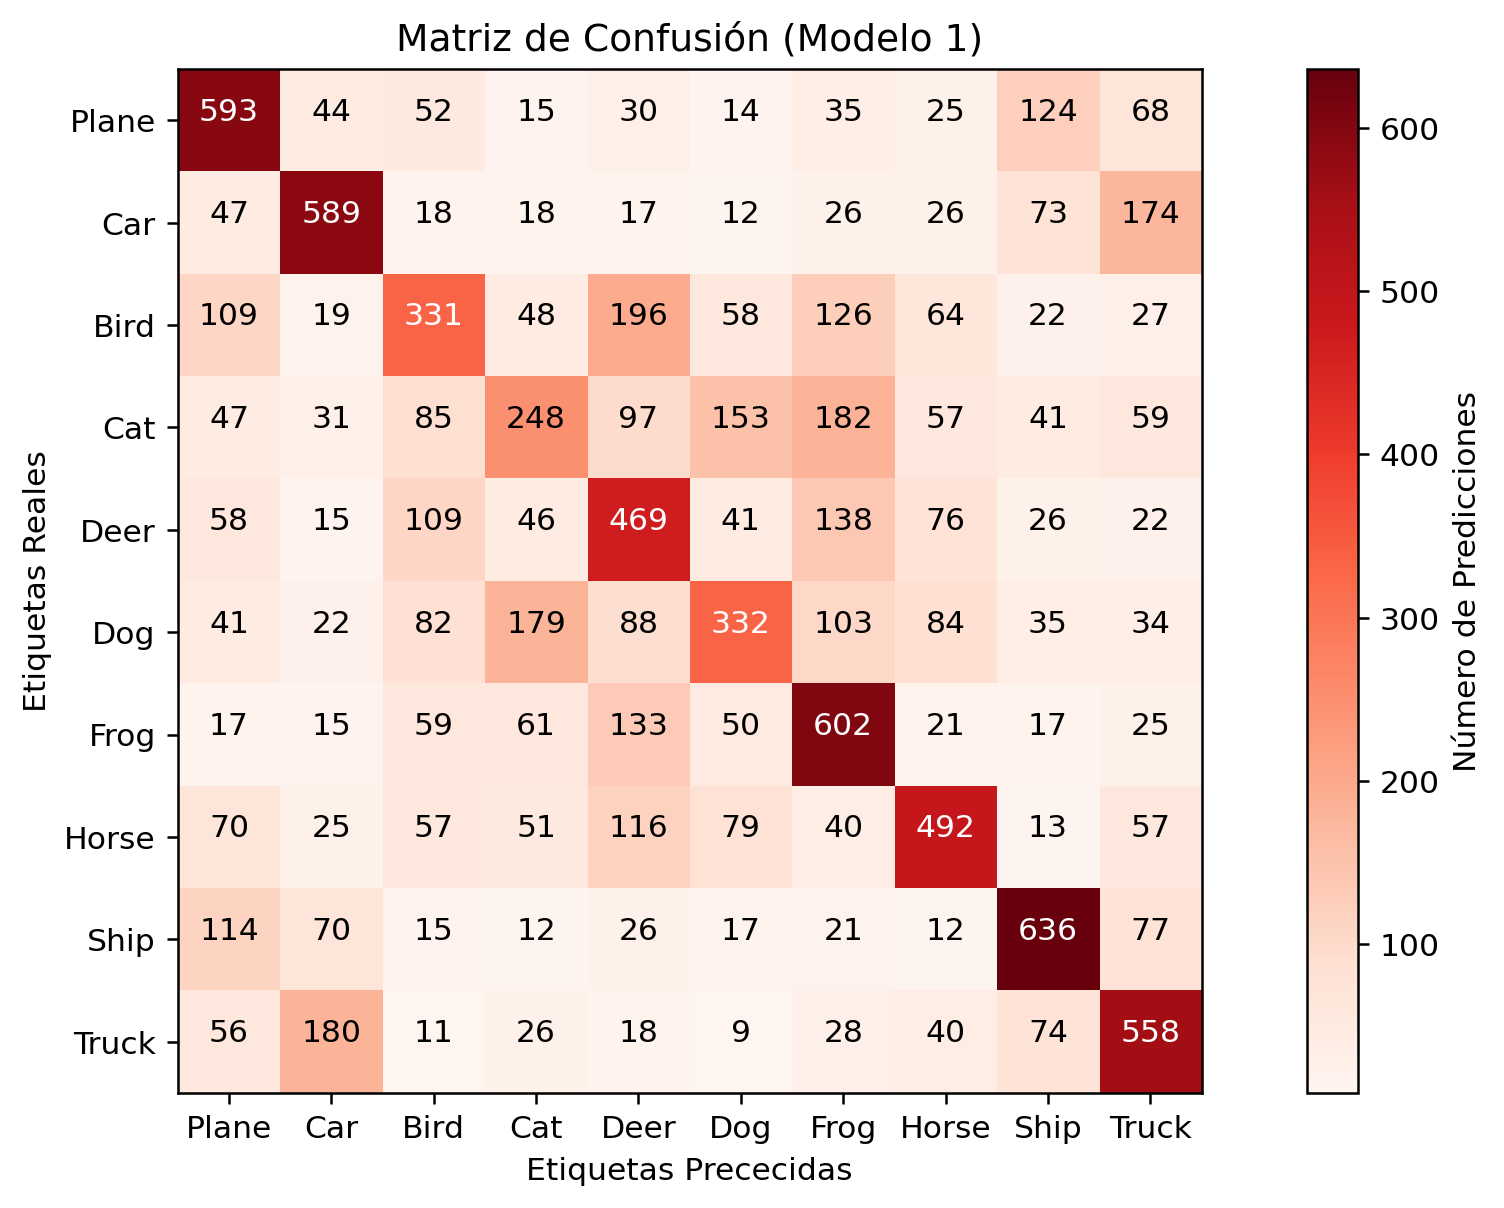

In [47]:
# Evaluación Modelo 1
evaluate_keras_model(model = model_1,
                        model_name = 'Modelo 1', 
                        x_test = x_test, 
                        x_val = x_val, 
                        y_test = y_test, 
                        y_val = y_val, 
                        classes = NR_CLASSES, 
                        labels = LABEL_NAMES)

### 5.2. **Evaluación (Modelo 2)**

----------------------------------------------------------------------------------------------------
Evaluación del Modelo <class 'tensorflow.python.keras.engine.sequential.Sequential'> (Modelo 2): 
----------------------------------------------------------------------------------------------------
Visualización de 10 de las predicciones de forma aleatoria:
Valor real: 6 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 4 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 1 ... Acierto: SI
Valor real: 1 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 2 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 7 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 8 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 3 vs. Valor predecido: 1 ... Acierto: NO
----------------------------------------------------------------------------------------------------
Matriz de

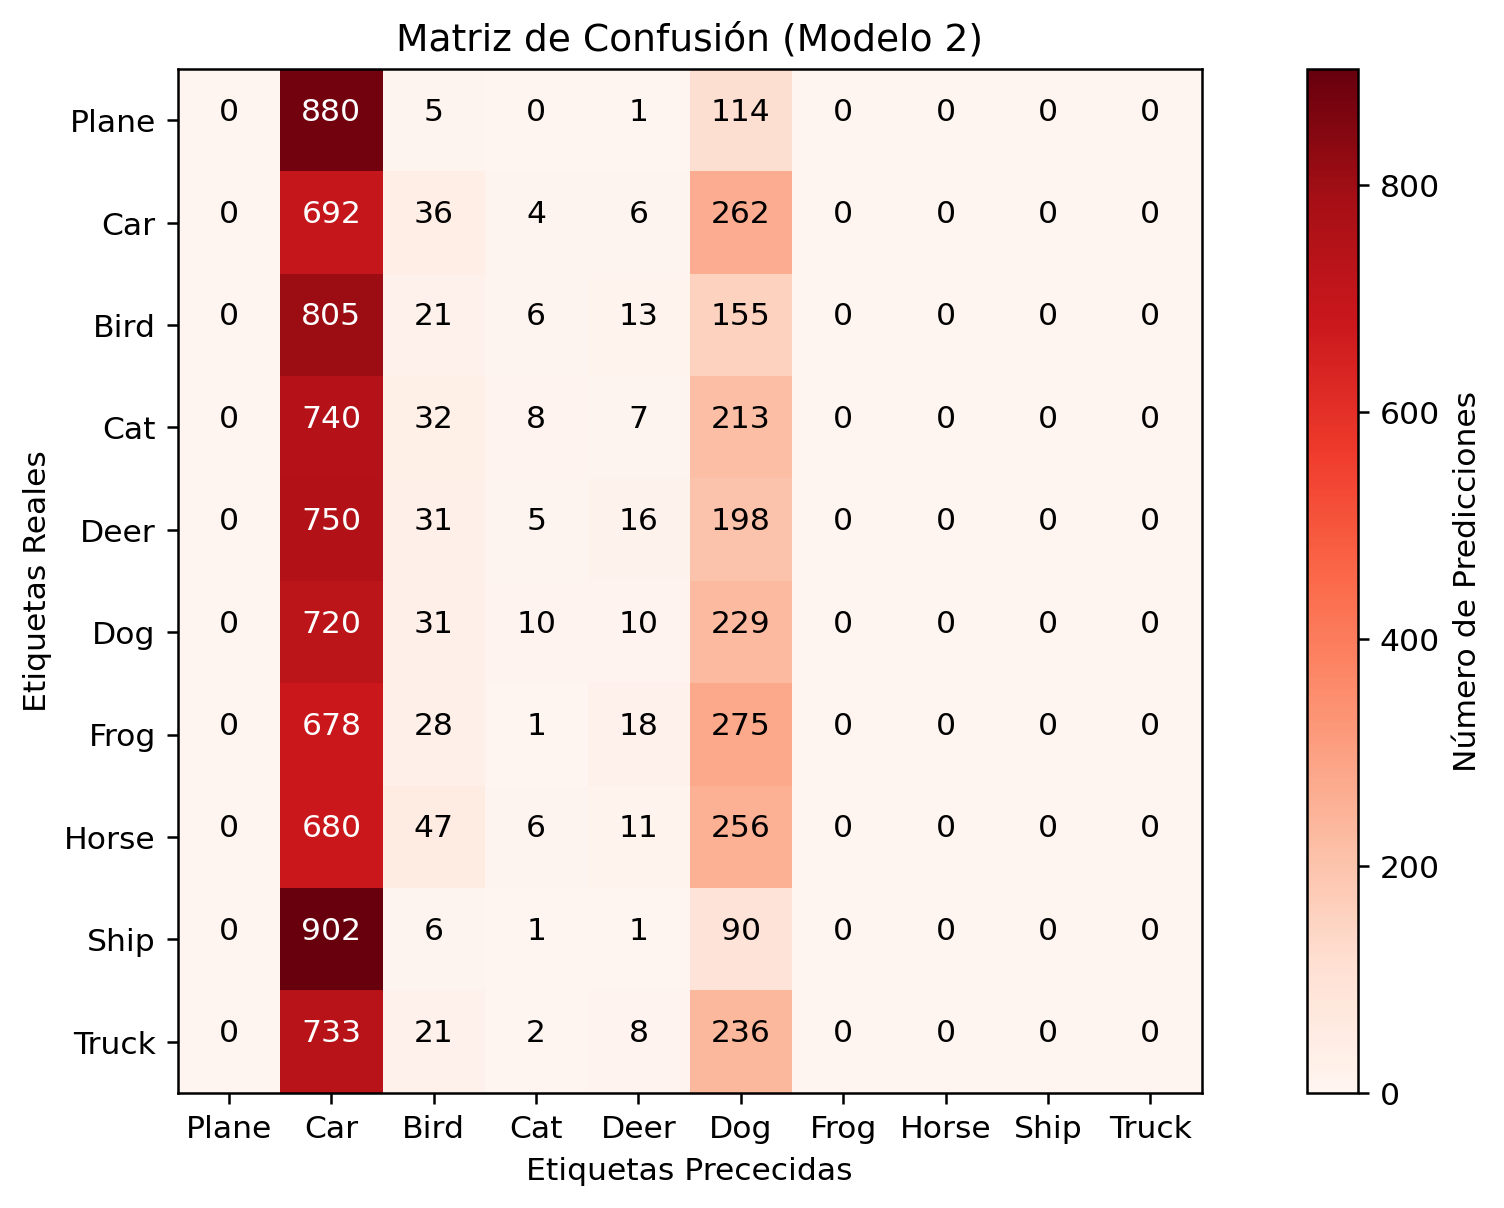

In [48]:
# Evaluación Modelo 2
evaluate_keras_model(model = model_2,
                        model_name = 'Modelo 2', 
                        x_test = x_test, 
                        x_val = x_val, 
                        y_test = y_test, 
                        y_val = y_val, 
                        classes = NR_CLASSES, 
                        labels = LABEL_NAMES)

### 5.3. **Evaluación (Modelo 3)**

----------------------------------------------------------------------------------------------------
Evaluación del Modelo <class 'tensorflow.python.keras.engine.sequential.Sequential'> (Modelo 3): 
----------------------------------------------------------------------------------------------------
Visualización de 10 de las predicciones de forma aleatoria:
Valor real: 6 vs. Valor predecido: 6 ... Acierto: SI
Valor real: 9 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 4 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 0 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 2 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 7 vs. Valor predecido: 0 ... Acierto: NO
Valor real: 8 vs. Valor predecido: 2 ... Acierto: NO
Valor real: 3 vs. Valor predecido: 2 ... Acierto: NO
----------------------------------------------------------------------------------------------------
Matriz de

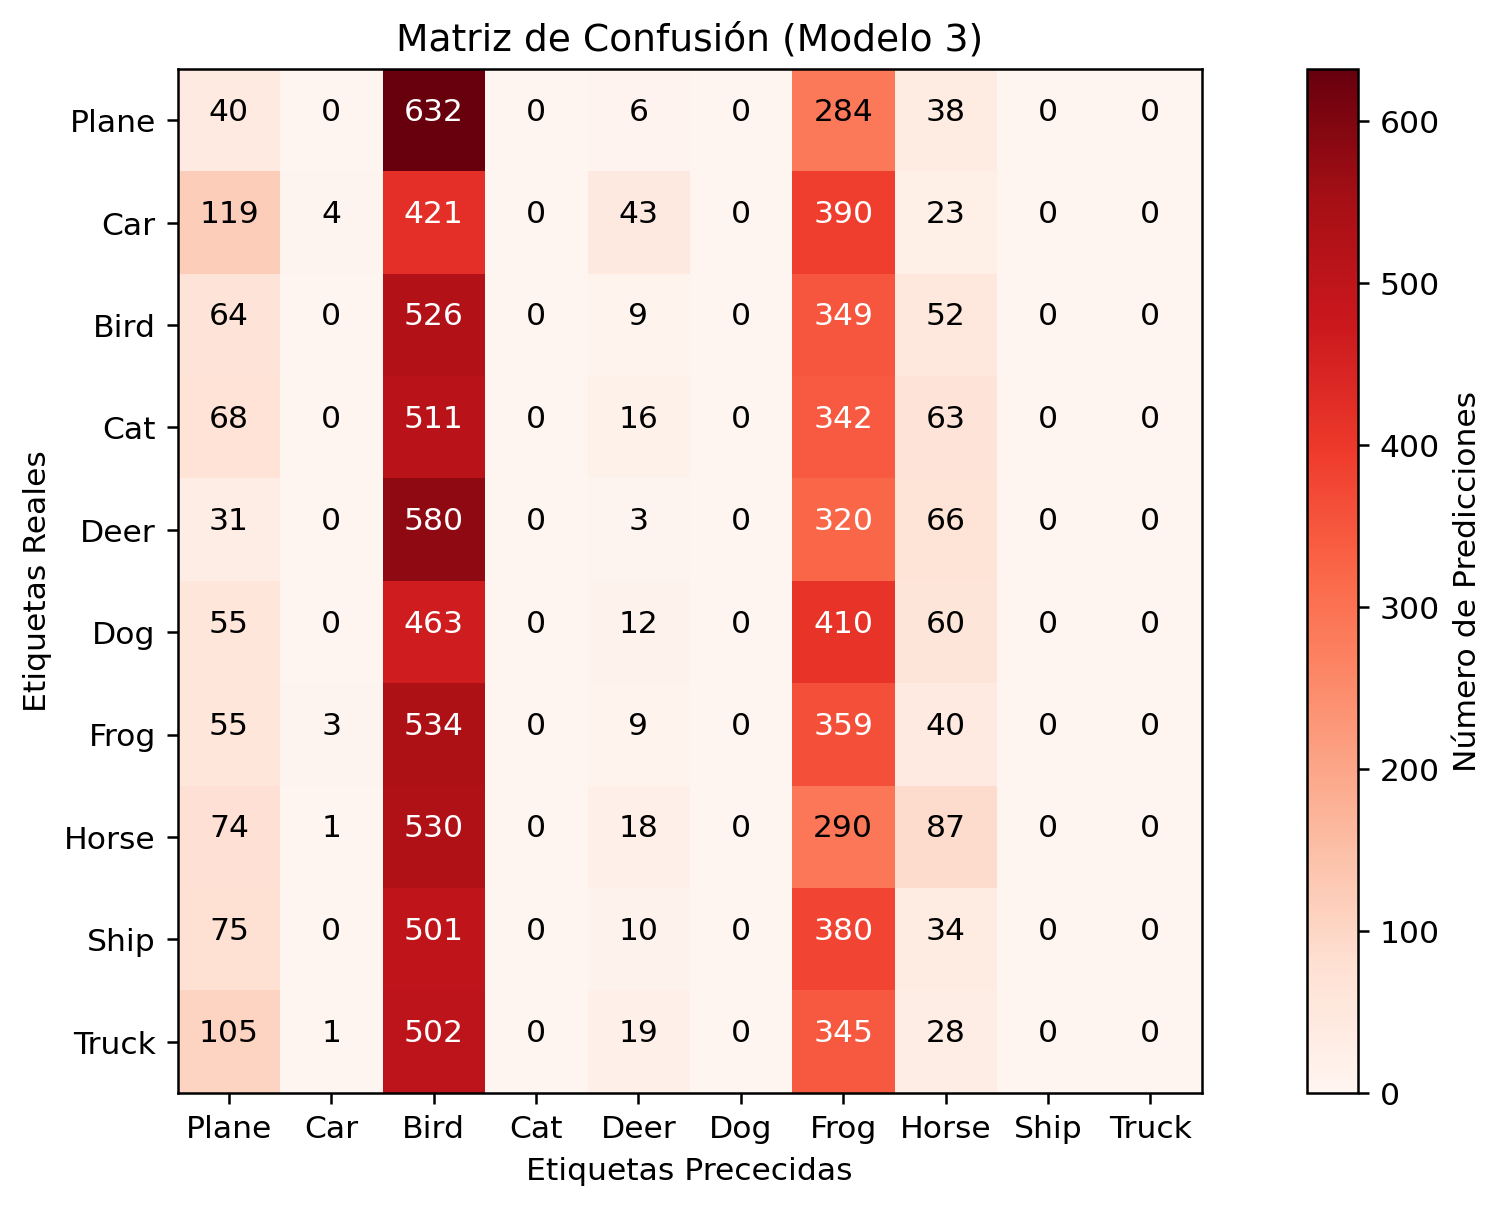

In [49]:
# Evaluación Modelo 3
evaluate_keras_model(model = model_3,
                        model_name = 'Modelo 3', 
                        x_test = x_test, 
                        x_val = x_val, 
                        y_test = y_test, 
                        y_val = y_val, 
                        classes = NR_CLASSES, 
                        labels = LABEL_NAMES)

----------------------------------------------------------------------------------------------------
Evaluación del Modelo <class 'tensorflow.python.keras.engine.sequential.Sequential'> (Modelo 4): 
----------------------------------------------------------------------------------------------------
Visualización de 10 de las predicciones de forma aleatoria:
Valor real: 6 vs. Valor predecido: 4 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 0 ... Acierto: NO
Valor real: 4 vs. Valor predecido: 2 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 1 ... Acierto: SI
Valor real: 1 vs. Valor predecido: 4 ... Acierto: NO
Valor real: 2 vs. Valor predecido: 2 ... Acierto: SI
Valor real: 7 vs. Valor predecido: 8 ... Acierto: NO
Valor real: 8 vs. Valor predecido: 1 ... Acierto: NO
Valor real: 3 vs. Valor predecido: 4 ... Acierto: NO
----------------------------------------------------------------------------------------------------
Matriz de

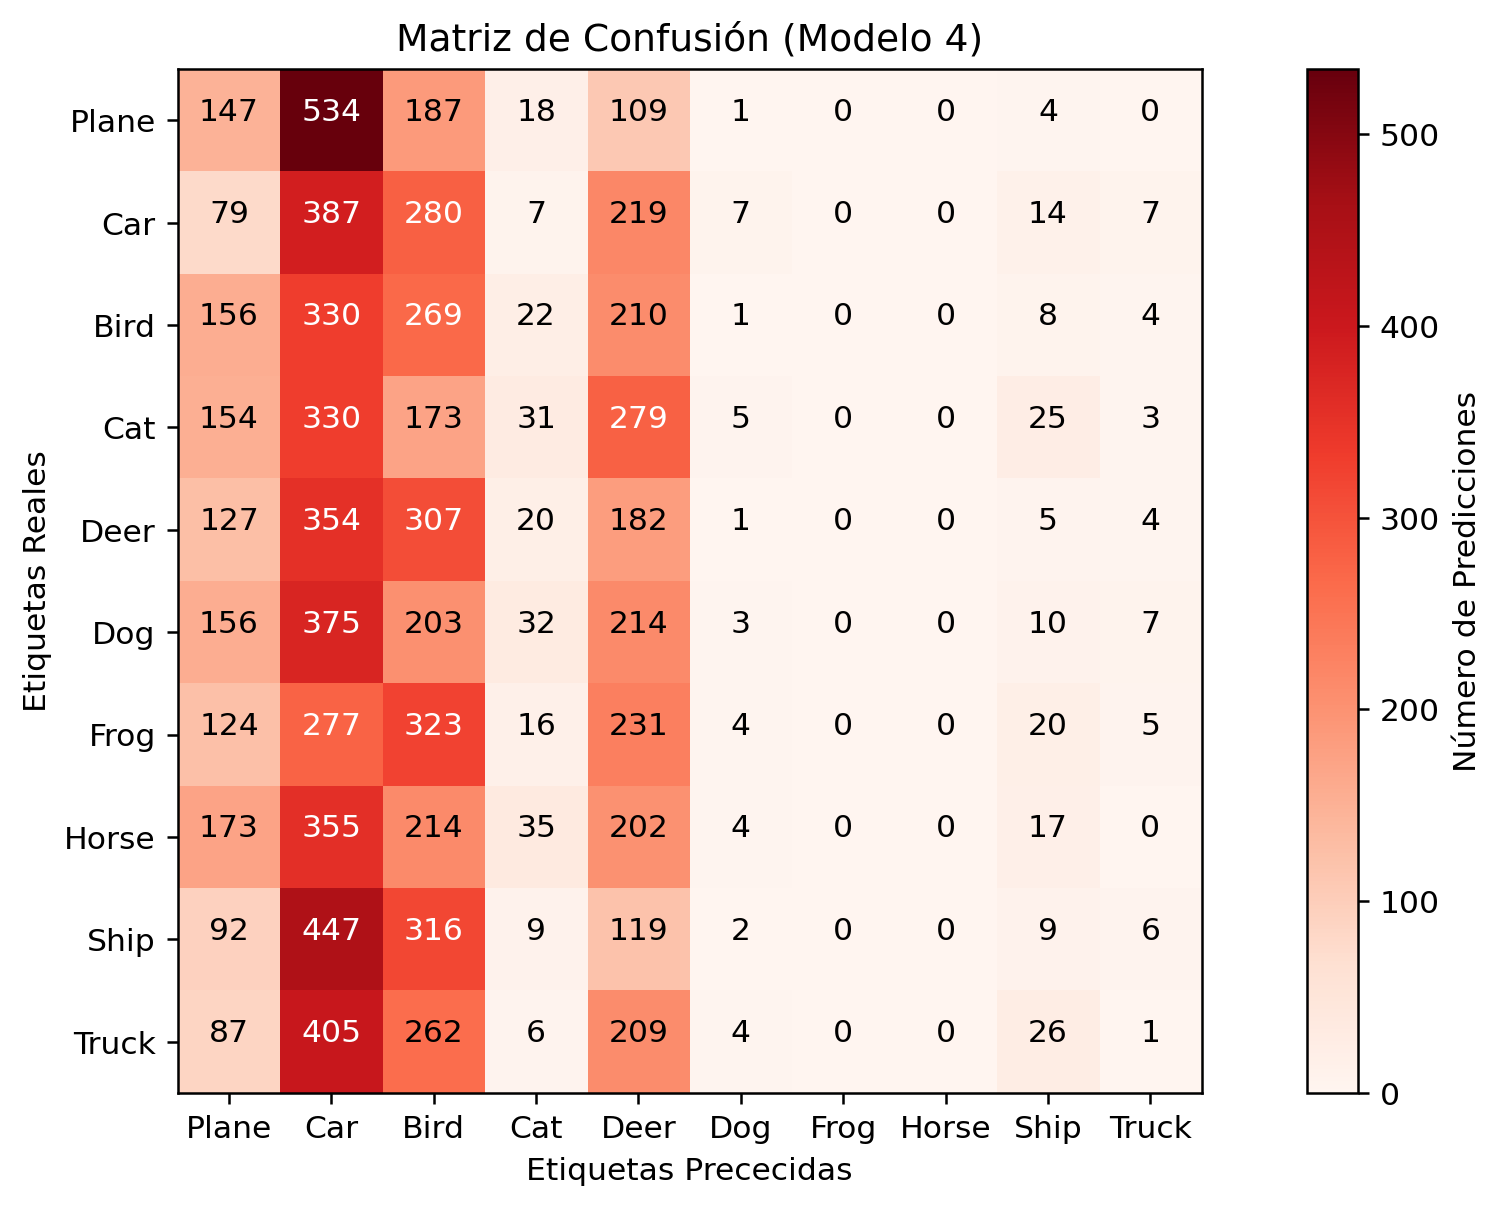

In [50]:
# Evaluación Modelo 4
evaluate_keras_model(model = model_4,
                        model_name = 'Modelo 4', 
                        x_test = x_test, 
                        x_val = x_val, 
                        y_test = y_test, 
                        y_val = y_val, 
                        classes = NR_CLASSES, 
                        labels = LABEL_NAMES)

----------------------------------------------------------------------------------------------------
Evaluación del Modelo <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> (Modelo 5): 
----------------------------------------------------------------------------------------------------
Visualización de 10 de las predicciones de forma aleatoria:
Valor real: 5 vs. Valor predecido: 8 ... Acierto: NO
Valor real: 2 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 3 vs. Valor predecido: 8 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 1 vs. Valor predecido: 8 ... Acierto: NO
Valor real: 0 vs. Valor predecido: 6 ... Acierto: NO
Valor real: 4 vs. Valor predecido: 2 ... Acierto: NO
Valor real: 9 vs. Valor predecido: 3 ... Acierto: NO
Valor real: 6 vs. Valor predecido: 5 ... Acierto: NO
Valor real: 5 vs. Valor predecido: 6 ... Acierto: NO
----------------------------------------------------------------------------------------------------
Ma

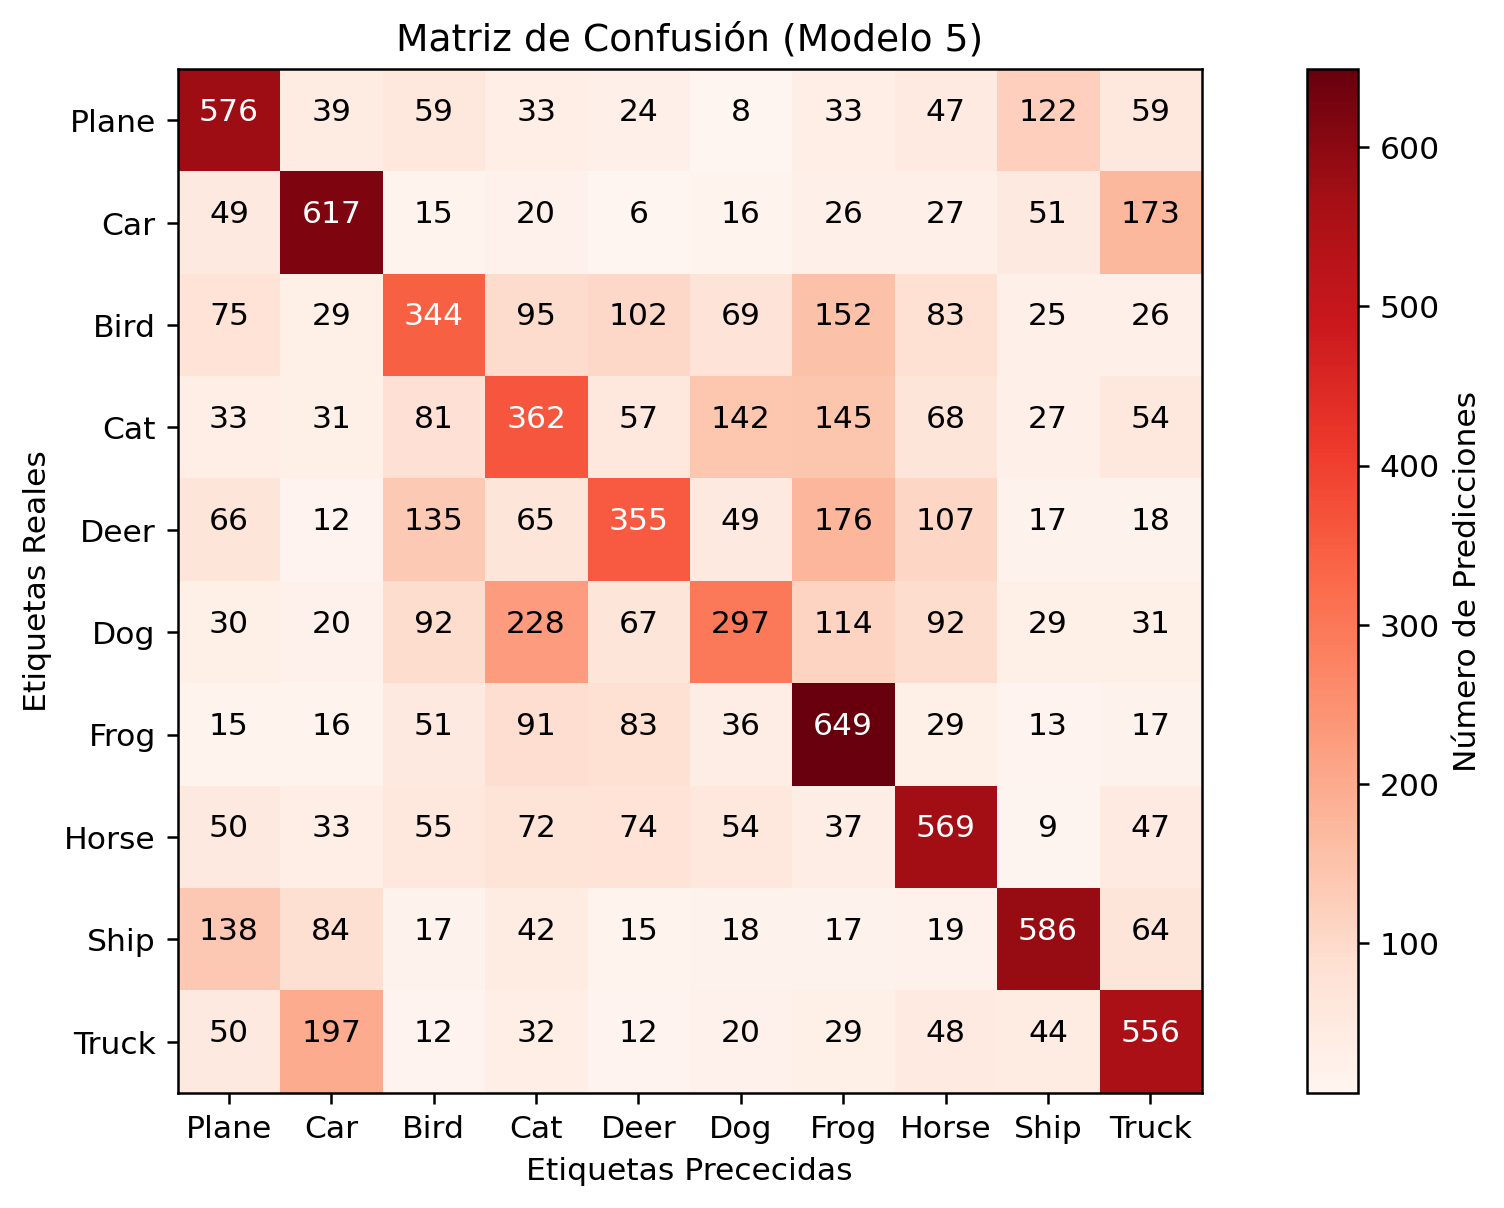

In [51]:
# Evaluación Modelo 5
evaluate_sklearn_model(model = model_5, 
                model_name = 'Modelo 5', 
                labels = LABEL_NAMES, 
                classes = NR_CLASSES, 
                x_train = x_train, 
                x_test = x_test, 
                x_val = y_val, 
                y_train = y_train, 
                y_test = y_test, 
                y_val = y_val,
                average_type = 'macro')

In [52]:
# Celda de Pruebas: Métricas de Evaluación
y_prediction = model_3.predict(x_test, batch_size = SAMPLES_PER_BATCH, verbose = 1)
y_pred_bool = np.argmax(y_prediction, axis = 1)
print(classification_report(y_test, y_pred_bool, zero_division = 'warn'))

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.06      0.04      0.05      1000
           1       0.44      0.00      0.01      1000
           2       0.10      0.53      0.17      1000
           3       0.00      0.00      0.00      1000
           4       0.02      0.00      0.01      1000
           5       0.00      0.00      0.00      1000
           6       0.10      0.36      0.16      1000
           7       0.18      0.09      0.12      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.09      0.10      0.05     10000
weighted avg       0.09      0.10      0.05     10000



## 6. **Metodología CRISP-MD (Parte 6): Despliegue**
---

En la siguiente celda se realiza la conversión del modelo **`model_5`** al formato **.mlmodel** de *Apple* para ser desplegado y utilizado en una sencilla aplicación.

El error que se menciona anteriormente se puede consultar [aquí](https://github.com/apple/coremltools/issues/746).

In [53]:
# Exportar Modelo en Formato .mlmodel (ERROR)
try: 
    coreml_model = coremltools.converters.sklearn.convert(model_5)
    coreml_model.short_description = "CIFAR10 MLPC SKLearn Classifier"
    coreml_model.save("cifar10_sklearn_mlpc.mlmodel")
except Exception() as error:
    print(f'Error generando el archivo .mlmodel: {error}')

TypeError: catching classes that do not inherit from BaseException is not allowed

Por el momento, no es posible generar un modelo en formato **.mlmodel** debido a un error con la distribucióm actual de **`sklearn`** y **`coremltools`**. Por ello, se hará uso de los siguientes comandos para descargar el dataset CIFAR 10 en formato PNG para entrenar nuevamente un modelo mediante la aplicación **Create ML** de **Xcode**.

In [45]:
# Descargar dataset CIFAR 10 en formato PNG
current_path = os.getcwd() + '/cifar10_png'
!pip install cifar2png; cifar2png cifar10 $current_path

zsh:1: no matches found: (Part 2)/Module


El proceso para descargar el dataset y entrenar un nuevo modelo en el software **`Create ML`** tarda unas dos horas aproximadamente. En la celda siguiente se muestra un video del proceso llevado a cabo, en el cual se muestran los resultados esperados de haber sido posible la conversion de alguno de los modelos implementados al formato **.mlmodel**. En la celda siguiente se muestra el vídeo. En caso de que esta celda no funcione correctamente, el video está disponible en YouTube [haciendo clic aquí](https://youtu.be/7S5Uke6AQk0).

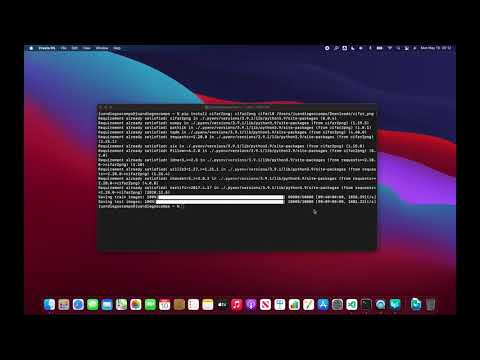

In [54]:
# Reproducir Video de YouTube (URL: https://youtu.be/7S5Uke6AQk0)
YouTubeVideo(id='7S5Uke6AQk0', width=1280, height=720)

## **7. Conclusiones**
---

- Los perceptrones multicapa son los tipos de redes neuronales más utilizados, puesto que se pueden utilizar en una amplia gama de aplicaciones debido al algoritmo de retropropagación que emplean para la fase de entrenamiento. 
- Es frecuente encontrarse con una serie de problemas prácticos durante la implementación del algoritmo los cuales están relacionados con la configuración de los hiperparámetros del modelo. Por ejemplo, una tasa de aprendizaje muy baja conlleva a una convergencia lenta del algoritmo, mientras que una tasa muy alta puede causar fallas. 
- Así mismo, esta clase de modelos son muy propensos al sobreajuste debido a que manejan un número muy alto de parámetros. Por ello, es importante utilizar métodos de regularización para evitar que esto suceda. Unas alternativas para abordar este problema consiste en añadir capas de *Dropout* para que en cada una de estas el modelo elimine aleatoriamete una fracción del dataset durante el entrenamiento o también se puede utilizar el callback *early stopping* para que el modelo automáticamente detenga el entrenamiento una vez transcurran un determinado número de iteraciones sin que haya mejoría alguna en el desempeño.
- Existen diversas herramientas para el desarrollo de algoritmos de Machine Learning. En este proyecto se han utilizado tres de ellas: **Tensorflow** y **sci-kit-learn** en este Notebook de Python y **Create ML** en el apartado de Metodología CRISP-MD (Parte 6): Despliegue (Resultados Esperados). La prinicpal diferencia entre las dos herramientas utilizadas en este Notebook es que mientras **sklearn** es una biblioteca de Machine Learning de uso general, **Tensorflow** se posiciona como una librería oriemtada al *deep learning*. 
- En concreto, en este Notebook podemos evidenciar esta diferencia de *orientación* entre los módulos con el hecho de que mientras en Tensorflow (Keras) se debe configurar cada parte del modelo, en Scikit Learn todo el proceso de entrenamiento se puede hacer en una sola línea de código. Sin embargo, cabe mencionar que se evidenció un tiempo de entrenamiento significativamente mayor en el **modelo 5** (elaborado con sklearn) que en los otros modelos (diseñados con Keras y Tensorlow). 
- El desempeño general de los cinco modelos es bastante similar, resultando en un **accuracy score** de entre 55%-60% sobre el conjunto de entrenamiento y de cerca del 50% sobre el dataset de validación.

## **8. Video de Presentación**
---

A continuación se muestra el video de presentación correspondiente del proyecto. En caso de que esta celda no funcione correctamente, el video está disponible en YouTube [haciendo clic aquí](https://youtu.be/7S5Uke6AQk0).

In [56]:
# Reproducir Video de YouTube (URL: https://youtu.be/-rKjjvMuzcg)
YouTubeVideo(id='-rKjjvMuzcg', width=1280, height=720)